In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

Reading in the data

In [18]:
customers = pd.read_csv("data/customers.csv",index_col="user_id")
customers

,num_clicks,num_sessions,avg_session_duration,avg_bags,age,gender,married,has_children,home_country,home_city,home_airport,num_trips,num_flights,money_spent_hotel,time_after_booking,avg_km_flown
user_id,,,,,,,,,,,,,,,,
23557,82,8,76.625000,0.000000,66,F,True,False,usa,new york,LGA,2,0,3670.5,0.00,0.000000
94883,73,8,67.750000,0.500000,52,F,True,False,usa,kansas city,MCI,2,4,130.0,6.50,1451.335404
101486,131,8,122.250000,0.000000,52,F,True,True,usa,tacoma,TCM,2,2,2199.0,9.00,995.681600
101961,126,8,117.750000,0.400000,44,F,True,False,usa,boston,BOS,5,10,2429.0,5.60,1366.569097
106907,240,8,758.915066,5.000000,46,F,True,True,usa,miami,TNT,0,0,0.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792549,114,8,106.875000,0.500000,47,F,False,False,usa,kansas city,MCI,4,8,144.0,4.75,1459.165621
796032,148,8,545.319542,1.250000,52,F,True,False,canada,winnipeg,YAV,2,4,1261.0,7.00,1876.245079
801660,115,8,106.000000,0.333333,55,F,True,True,canada,toronto,YKZ,3,6,872.0,6.00,710.553530


Looking at some of the columns:

In [19]:
customers["gender"].value_counts()

gender
F    5292
M     695
O      11
Name: count, dtype: int64

In [21]:
customers["home_country"].value_counts()

home_country
usa       4991
canada    1007
Name: count, dtype: int64

Converting to the numerical type:

In [22]:
customers["married"] = customers["married"].astype("int")
customers["has_children"] = customers["has_children"].astype("int")
customers["gender"] = (customers["gender"] == 'F').astype("int")
customers["home_country"] = (customers["home_country"] == 'canada').astype("int")
customers

,num_clicks,num_sessions,avg_session_duration,avg_bags,age,gender,married,has_children,home_country,home_city,home_airport,num_trips,num_flights,money_spent_hotel,time_after_booking,avg_km_flown
user_id,,,,,,,,,,,,,,,,
23557,82,8,76.625000,0.000000,66,1,1,0,0,new york,LGA,2,0,3670.5,0.00,0.000000
94883,73,8,67.750000,0.500000,52,1,1,0,0,kansas city,MCI,2,4,130.0,6.50,1451.335404
101486,131,8,122.250000,0.000000,52,1,1,1,0,tacoma,TCM,2,2,2199.0,9.00,995.681600
101961,126,8,117.750000,0.400000,44,1,1,0,0,boston,BOS,5,10,2429.0,5.60,1366.569097
106907,240,8,758.915066,5.000000,46,1,1,1,0,miami,TNT,0,0,0.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792549,114,8,106.875000,0.500000,47,1,0,0,0,kansas city,MCI,4,8,144.0,4.75,1459.165621
796032,148,8,545.319542,1.250000,52,1,1,0,1,winnipeg,YAV,2,4,1261.0,7.00,1876.245079
801660,115,8,106.000000,0.333333,55,1,1,1,1,toronto,YKZ,3,6,872.0,6.00,710.553530


Dropping the columns that aren hard to encode. If encoded, they would result into high number of classes:

In [23]:
customers = customers.drop(["home_city","home_airport"],axis=1)
customers

,num_clicks,num_sessions,avg_session_duration,avg_bags,age,gender,married,has_children,home_country,num_trips,num_flights,money_spent_hotel,time_after_booking,avg_km_flown
user_id,,,,,,,,,,,,,,
23557,82,8,76.625000,0.000000,66,1,1,0,0,2,0,3670.5,0.00,0.000000
94883,73,8,67.750000,0.500000,52,1,1,0,0,2,4,130.0,6.50,1451.335404
101486,131,8,122.250000,0.000000,52,1,1,1,0,2,2,2199.0,9.00,995.681600
101961,126,8,117.750000,0.400000,44,1,1,0,0,5,10,2429.0,5.60,1366.569097
106907,240,8,758.915066,5.000000,46,1,1,1,0,0,0,0.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792549,114,8,106.875000,0.500000,47,1,0,0,0,4,8,144.0,4.75,1459.165621
796032,148,8,545.319542,1.250000,52,1,1,0,1,2,4,1261.0,7.00,1876.245079
801660,115,8,106.000000,0.333333,55,1,1,1,1,3,6,872.0,6.00,710.553530


Looking at the stats for the resulting dataset:

In [24]:
customers.describe(include = "all")

,num_clicks,num_sessions,avg_session_duration,avg_bags,age,gender,married,has_children,home_country,num_trips,num_flights,money_spent_hotel,time_after_booking,avg_km_flown
count,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000
mean,144.308436,8.204568,187.060316,0.518031,42.473825,0.882294,0.440480,0.326442,0.167889,2.582361,4.291097,1757.946315,10.461487,1874.112150
std,72.330165,0.460911,241.058619,0.516093,12.046872,0.322286,0.496486,0.468950,0.373799,1.533290,2.986260,2070.992742,28.836139,1598.239400
min,33.000000,8.000000,31.500000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,102.000000,8.000000,93.000000,0.000000,35.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,411.000000,5.000000,1006.493564
50%,127.000000,8.000000,116.375000,0.500000,43.000000,1.000000,0.000000,0.000000,0.000000,3.000000,4.000000,1146.100000,6.600000,1824.037125
75%,161.000000,8.000000,147.375000,1.000000,50.000000,1.000000,1.000000,1.000000,0.000000,4.000000,6.000000,2373.500000,8.000000,2512.142021
max,873.000000,12.000000,2137.625000,5.666667,89.000000,1.000000,1.000000,1.000000,1.000000,8.000000,16.000000,28114.000000,365.000000,22272.194376


Scaling features:

In [25]:
scaler = StandardScaler()
customers_scaled = scaler.fit_transform(customers)

Checking what we ended up after the scaling performed:

In [26]:
customers_scaled = pd.DataFrame(customers_scaled)
customers_scaled.index = customers.index
customers_scaled.columns = customers.columns
customers_scaled

,num_clicks,num_sessions,avg_session_duration,avg_bags,age,gender,married,has_children,home_country,num_trips,num_flights,money_spent_hotel,time_after_booking,avg_km_flown
user_id,,,,,,,,,,,,,,
23557,-0.861517,-0.443872,-0.458165,-1.003839,1.953049,0.365252,1.127054,-0.696171,-0.449181,-0.379843,-1.437067,0.923573,-0.362821,-1.172708
94883,-0.985956,-0.443872,-0.494984,-0.034941,0.790825,0.365252,1.127054,-0.696171,-0.449181,-0.379843,-0.097487,-0.786136,-0.137391,-0.264549
101486,-0.184011,-0.443872,-0.268879,-1.003839,0.790825,0.365252,1.127054,1.436430,-0.449181,-0.379843,-0.767277,0.212985,-0.050687,-0.549670
101961,-0.253144,-0.443872,-0.287549,-0.228720,0.126697,0.365252,1.127054,-0.696171,-0.449181,1.576897,1.911883,0.324052,-0.168604,-0.317590
106907,1.323093,-0.443872,2.372462,8.685138,0.292729,0.365252,1.127054,1.436430,-0.449181,-1.684337,-1.437067,-0.848913,-0.362821,-1.172708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792549,-0.419064,-0.443872,-0.332666,-0.034941,0.375745,0.365252,-0.887269,-0.696171,-0.449181,0.924651,1.242093,-0.779375,-0.198083,-0.259649
796032,0.051042,-0.443872,1.486315,1.418406,0.790825,0.365252,1.127054,-0.696171,2.226276,-0.379843,-0.097487,-0.239976,-0.120050,0.001335
801660,-0.405237,-0.443872,-0.336296,-0.357907,1.039873,0.365252,1.127054,1.436430,2.226276,0.272404,0.572303,-0.427824,-0.154731,-0.728086


In [27]:
customers_scaled.describe()

,num_clicks,num_sessions,avg_session_duration,avg_bags,age,gender,married,has_children,home_country,num_trips,num_flights,money_spent_hotel,time_after_booking,avg_km_flown
count,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03,5.998000e+03
mean,4.501605e-17,1.421559e-15,-2.191571e-17,-1.421559e-16,9.358599e-17,7.107797e-18,2.369266e-18,-1.006938e-17,4.501605e-17,6.633944e-17,9.477062e-18,-3.790825e-17,3.731593e-17,-3.316972e-17
std,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00
min,-1.539022e+00,-4.438717e-01,-6.453753e-01,-1.003839e+00,-2.031719e+00,-2.737837e+00,-8.872693e-01,-6.961706e-01,-4.491806e-01,-1.684337e+00,-1.437067e+00,-8.489131e-01,-3.628211e-01,-1.172708e+00
25%,-5.849836e-01,-4.438717e-01,-3.902294e-01,-1.003839e+00,-6.204472e-01,3.652519e-01,-8.872693e-01,-6.961706e-01,-4.491806e-01,-1.032090e+00,-7.672768e-01,-6.504410e-01,-1.894131e-01,-5.429042e-01
50%,-2.393176e-01,-4.438717e-01,-2.932532e-01,-3.494092e-02,4.368099e-02,3.652519e-01,-8.872693e-01,-6.961706e-01,-4.491806e-01,2.724038e-01,-9.748692e-02,-2.954609e-01,-1.339225e-01,-3.133398e-02
75%,2.307883e-01,-4.438717e-01,-1.646430e-01,9.339567e-01,6.247931e-01,3.652519e-01,1.127054e+00,1.436430e+00,-4.491806e-01,9.246506e-01,5.723029e-01,2.972512e-01,-8.536829e-02,3.992412e-01
max,1.007536e+01,8.235322e+00,8.092336e+00,9.977001e+00,3.862418e+00,3.652519e-01,1.127054e+00,1.436430e+00,2.226276e+00,3.533638e+00,3.921252e+00,1.272735e+01,1.229596e+01,1.276391e+01


Reducing Dimensionality

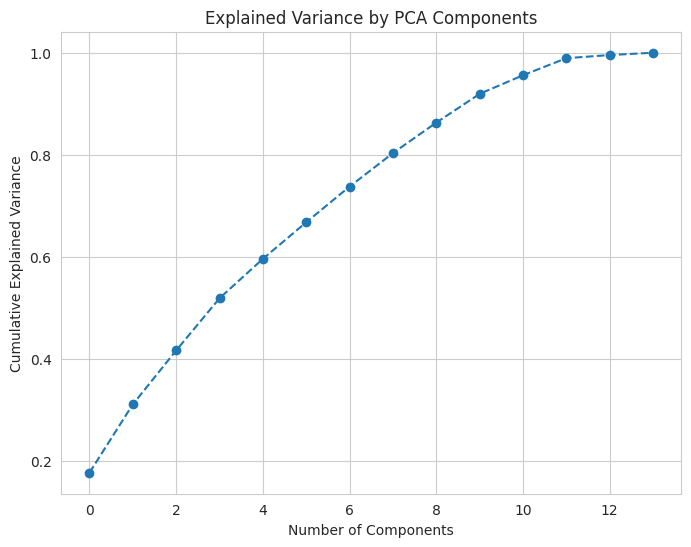

In [28]:
# Initialize PCA to keep all components
pca = PCA()

# Fit PCA to the scaled data
pca.fit(customers_scaled)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

Checking how resulting compotents are linked with the original features

In [29]:
component_matrix = pd.DataFrame(pca.components_).T
component_matrix.columns = [f"pca_{i}"for i in range(component_matrix.shape[1])]
component_matrix.index = customers_scaled.columns
component_matrix

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13
num_clicks,0.272042,0.634060,0.013508,-0.018664,0.041878,0.005930,-0.009745,0.009671,0.110533,-0.092774,0.021296,-0.030866,0.700675,-0.090974
num_sessions,0.069506,0.060336,0.136802,-0.046552,0.647330,-0.159400,0.153887,0.647035,-0.145127,0.239057,-0.003978,0.013810,-0.073619,0.005384
avg_session_duration,0.132308,0.686638,0.050648,0.043237,-0.021592,0.023814,-0.020971,-0.088591,0.136175,-0.035824,0.014802,0.021623,-0.684120,0.093455
avg_bags,0.235582,0.075670,0.180360,0.265485,-0.202424,-0.063497,0.208652,-0.254632,-0.587737,0.574317,-0.076770,-0.009223,0.033576,0.001419
age,0.163127,-0.076710,0.562431,-0.249055,0.005336,0.138066,-0.339928,-0.019729,0.032885,-0.042138,-0.671679,0.002259,-0.006595,0.007663
gender,0.005489,-0.064422,0.049285,-0.041930,0.648821,0.157957,0.333834,-0.644809,0.031948,-0.123225,-0.037610,0.028164,0.008094,-0.003540
married,0.063388,-0.090836,0.672358,-0.138421,-0.056713,0.098739,-0.060604,-0.038787,0.111445,0.040305,0.694374,-0.045418,0.006895,-0.007251
has_children,-0.051908,-0.015701,0.307233,0.101292,-0.283293,-0.198405,0.755777,0.159603,0.115007,-0.353835,-0.193552,-0.014719,-0.002043,-0.002630
home_country,0.016419,0.012602,-0.080530,0.039143,-0.080051,0.932739,0.221410,0.243136,-0.047158,0.051895,-0.012891,0.043812,-0.001858,0.000606
num_trips,0.559790,-0.162000,-0.163893,-0.207790,-0.033373,-0.025231,0.062582,0.025648,-0.066946,-0.150279,0.070305,-0.144413,0.006393,0.728783


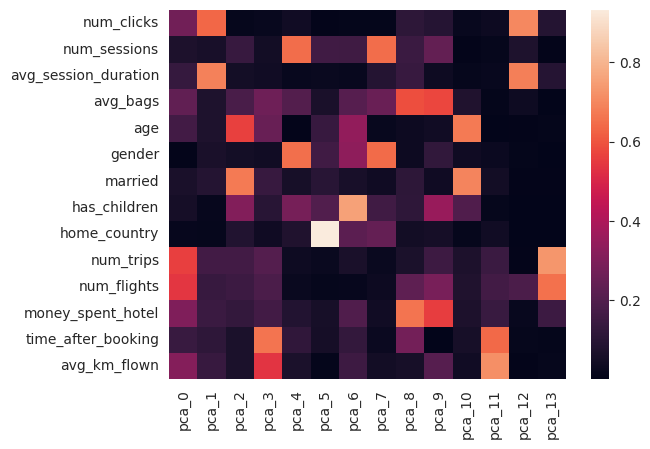

In [30]:
sns.heatmap(np.abs(component_matrix));

Setting up the number of components to be used:

In [31]:
# Initialize PCA to keep just selected number of components
pca = PCA(n_components=12)

# Fit PCA to the scaled data
data_after_pca = pca.fit_transform(customers_scaled)

In [34]:
data_after_pca = pd.DataFrame(data_after_pca)

In [35]:
data_after_pca = pd.DataFrame(data_after_pca)
data_after_pca.columns = [f"pca_{i}"for i in range(data_after_pca.shape[1])]
data_after_pca.index = customers_scaled.index
data_after_pca

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11
user_id,,,,,,,,,,,,
23557,-1.269247,-0.905566,1.473063,-1.672125,0.154529,0.245905,-1.137669,-0.695718,1.437877,0.780581,-0.583593,-0.215794
94883,-0.745703,-0.934812,1.086287,-0.457635,0.147232,0.102647,-1.019407,-0.755487,-0.512418,-0.123690,0.372088,-0.177209
101486,-0.974684,-0.401329,1.548112,-0.637913,-0.309421,-0.288063,0.595990,-0.254237,1.243292,-0.710989,-0.086492,-0.229272
101961,1.827152,-1.034987,-0.067035,-1.351087,-0.004430,-0.107465,-0.462235,-0.637749,-0.175271,-0.523401,1.071663,-0.664052
106907,0.335033,3.718160,3.553328,2.167956,-2.196309,-0.809532,2.548858,-2.979532,-4.525340,4.567391,-0.503213,-0.409658
...,...,...,...,...,...,...,...,...,...,...,...,...
792549,0.686769,-0.639507,-0.902803,-0.634124,0.197014,-0.201255,-0.654981,-0.602688,-1.069467,-0.822394,-0.531115,-0.462916
796032,0.434724,1.109376,1.197485,0.165461,-0.386844,2.527146,-0.109959,-0.650615,-0.727093,0.930841,0.248784,0.194578
801660,0.021510,-0.685279,1.339123,-0.864917,-0.684170,2.194975,1.216874,0.306593,-0.098875,-0.989041,-0.146589,-0.575768


In [ ]:
data_after_pca.to_csv("data_after_pca.csv")